In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time

In [2]:
data=np.loadtxt("B3_wire_1_W0028_F03-210209-093606-1.csv", dtype= np.int64, delimiter=",",usecols=(0,1,2,3),max_rows=50000000)

col=data[:,0]
row=data[:,1]
toa=data[:,2]
tot=data[:,3]

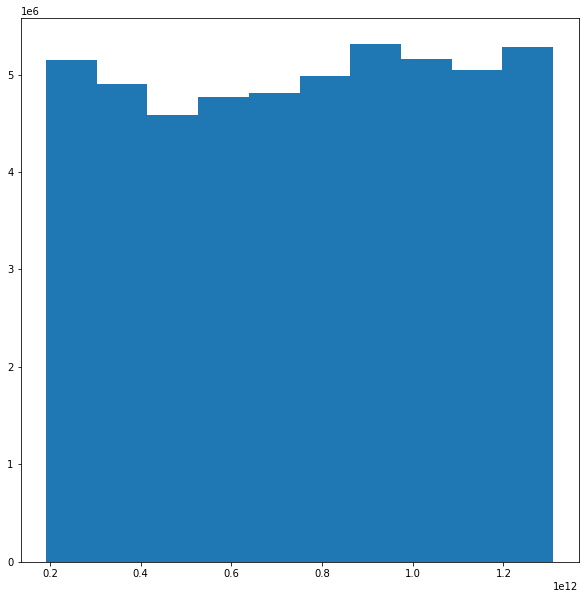

In [3]:
fig, ax0 = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax0.hist(toa)

In [4]:
#Filter out col145 row0 (bad pixel)

col_temp=[]
row_temp=[]
toa_temp=[]
tot_temp=[]



for i in range(len(col)):
    if not (col[i]==145 and row[i]==0):
        col_temp.append(col[i])
        row_temp.append(row[i])
        toa_temp.append(toa[i])
        tot_temp.append(tot[i])        
        
        
col=col_temp
row=row_temp
toa=toa_temp
tot=tot_temp


del col_temp
del row_temp
del toa_temp
del tot_temp

print (len(col))

48618353


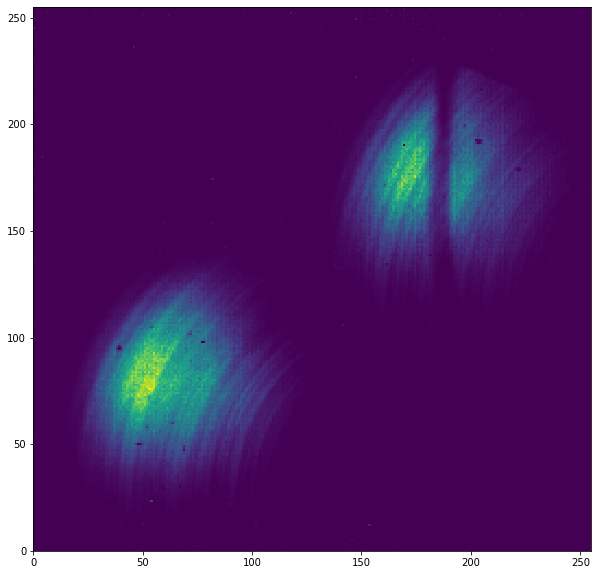

In [5]:
fig, ax0 = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax0.hist2d(col,row,weights=tot,bins=(256,256),range=((0,255),(0,255)))

In [46]:
time_window_min= 2e9
time_window_max=time_window_min+



col_1p=[]

row_1p=[]
toa_1p=[]
tot_1p=[]

for i in range(len(col)):
    if (toa[i]/4096*25) > time_window_min and (toa[i]/4096*25) < time_window_max :
        col_1p.append(col[i])
        row_1p.append(row[i])
        toa_1p.append(toa[i])
        tot_1p.append(tot[i])
    if (toa[i]/4096*25 - time_window_max) > 1e7:
        break


col_beam1=[]
row_beam1=[]
toa_beam1=[]
tot_beam1=[]
toa_beam1_ns=[]

col_beam2=[]
row_beam2=[]
toa_beam2=[]
tot_beam2=[]
toa_beam2_ns=[]



for i in range(len(col_1p)):
    if row_1p[i]>30 and row_1p[i]<130 and col_1p[i]>20 and col_1p[i]<120: #Adjust these parameters to locate the beam 1
        col_beam1.append(col_1p[i]-21)
        row_beam1.append(row_1p[i]-31)
        toa_beam1.append(toa_1p[i])
        toa_beam1_ns.append(toa_1p[i]/4096*25)
        tot_beam1.append(tot_1p[i])

    if row_1p[i]>125 and row_1p[i]<225 and col_1p[i]>135 and col_1p[i]<235:#Adjust these parameters to locate the beam 2
        col_beam2.append(col_1p[i]-136)
        row_beam2.append(row_1p[i]-126)
        toa_beam2.append(toa_1p[i])
        tot_beam2.append(tot_1p[i])
        toa_beam2_ns.append(toa_1p[i]/4096*25)
        
        
        
        
print (len(col_1p))
print (len(col_beam1))

7194
3763


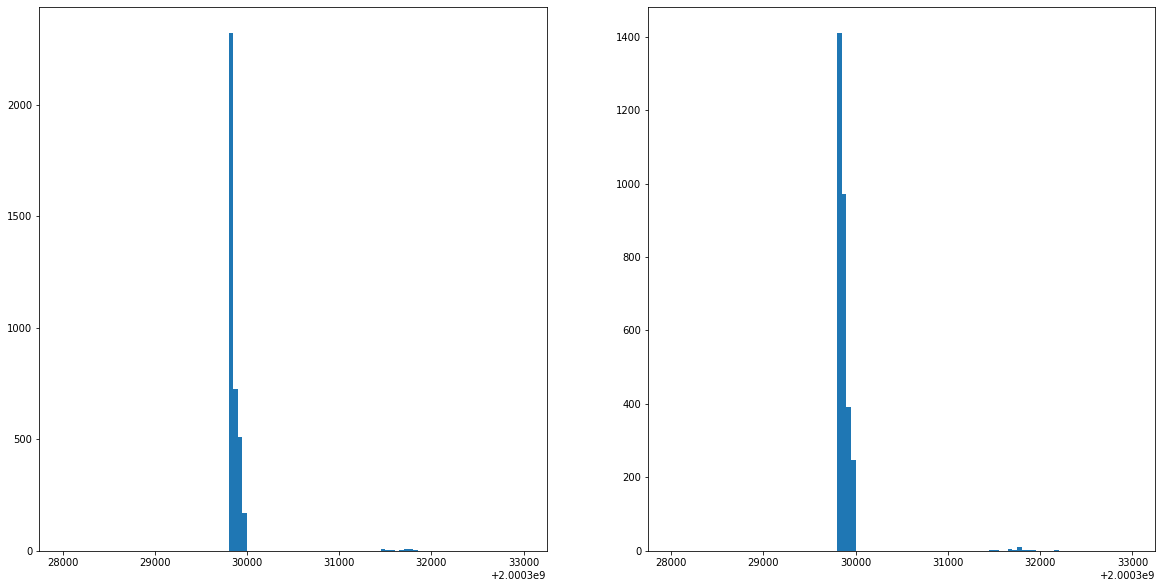

In [54]:

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20, 10))


_=ax[0].hist(toa_beam1_ns,bins=100,range=(2.000328e9,2.000333e9))
_=ax[1].hist(toa_beam2_ns,bins=100,range=(2.000328e9,2.000333e9))

Text(0.5, 1.0, 'Spot 2')

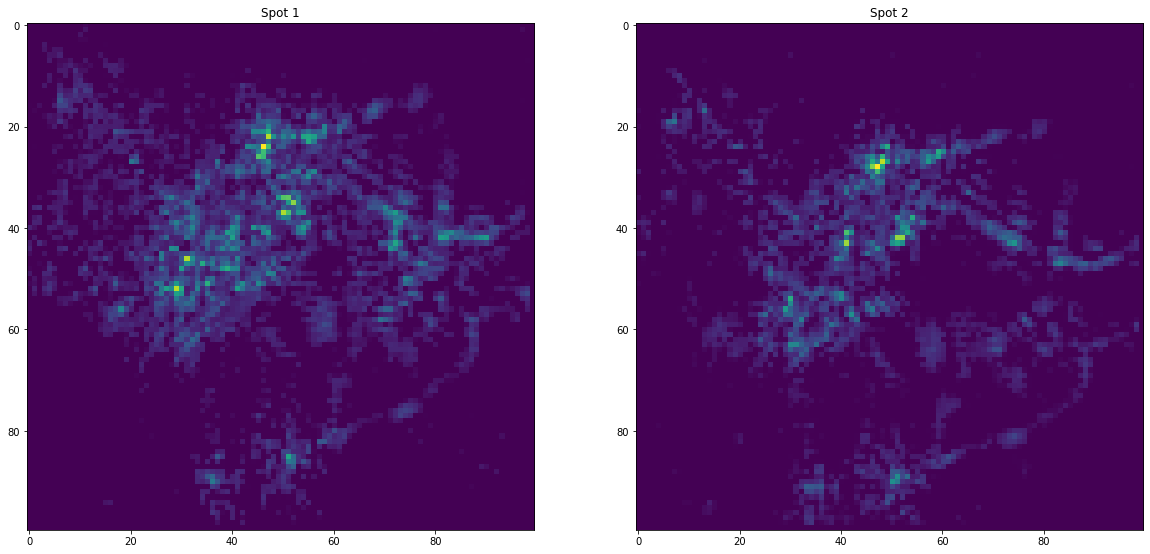

In [49]:
spot1matrix=np.zeros(shape=(100,100),dtype=np.int64)
spot2matrix=np.zeros(shape=(100,100),dtype=np.int64)

for i in range(len(col_beam1)):
    spot1matrix [col_beam1[i]] [row_beam1[i]] += tot_beam1[i]
    
for i in range(len(col_beam2)):
    spot2matrix[col_beam2[i]][row_beam2[i]] += tot_beam2[i]

    
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20, 10))


    
ax[0].imshow(spot1matrix)
ax[0].set_title("Spot 1")
ax[1].imshow(spot2matrix)
ax[1].set_title("Spot 2")